In [10]:
SELECTED_GFP="cgreGFP"

In [11]:
%run 00_functions.ipynb

Import modules
Define functions


cgreGFP


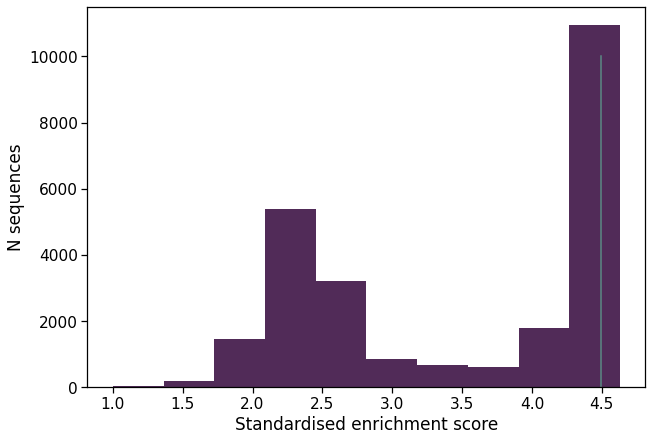

Number of sequences = 25172


In [12]:
%run kp03_load_data_ml.ipynb

# this notebook is called by other notebooks
# so SELECTED_GFP is not instanciated here

In [13]:
n, m = genotype_matrix.shape
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
l2_rate = 0.005

(x_train, x_test, 
y_train, y_test, 
idx_train, idx_test) = train_test_split(genotype_matrix, 
                                       labels, range(len(labels)),
                                       test_size=0.1,random_state=42)

inputs = Input(shape=(m,))

hidden = Dense(10)(inputs)
hidden = LeakyReLU()(hidden)
hidden = Dense(100)(hidden)
hidden = LeakyReLU()(hidden)
predictions = Dense(1, activation=None)(hidden)

optimiser = keras.optimizers.RMSprop(learning_rate=0.001)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimiser,
              loss='mse')

verbose=1
history = model.fit(x_train, y_train, batch_size=100, epochs=500, validation_data=(x_test, y_test), callbacks=[es], verbose=verbose)
test_set_predictions = model.predict([x_test]).flatten()
train_set_predictions = model.predict([x_train]).flatten()



Epoch 1/500
227/227 [==============================] - 9s 37ms/step - loss: 1.1113 - val_loss: 0.8253
Epoch 2/500
227/227 [==============================] - 7s 30ms/step - loss: 0.7652 - val_loss: 0.5946
Epoch 3/500
227/227 [==============================] - 7s 30ms/step - loss: 0.6233 - val_loss: 0.6818
Epoch 4/500
227/227 [==============================] - 6s 27ms/step - loss: 0.5594 - val_loss: 0.4410
Epoch 5/500
227/227 [==============================] - 6s 27ms/step - loss: 0.5136 - val_loss: 0.7376
Epoch 6/500
227/227 [==============================] - 7s 30ms/step - loss: 0.4848 - val_loss: 0.8241
Epoch 7/500
227/227 [==============================] - 3s 13ms/step - loss: 0.4633 - val_loss: 0.6678
Epoch 8/500
227/227 [==============================] - 6s 28ms/step - loss: 0.4426 - val_loss: 0.5018
Epoch 9/500
227/227 [==============================] - 6s 25ms/step - loss: 0.4129 - val_loss: 0.3266
Epoch 10/500
227/227 [==============================] - 7s 30ms/step - loss: 0.391

In [14]:
model.save(f'4_ML/2_models/{SELECTED_GFP}_DNN.h5')

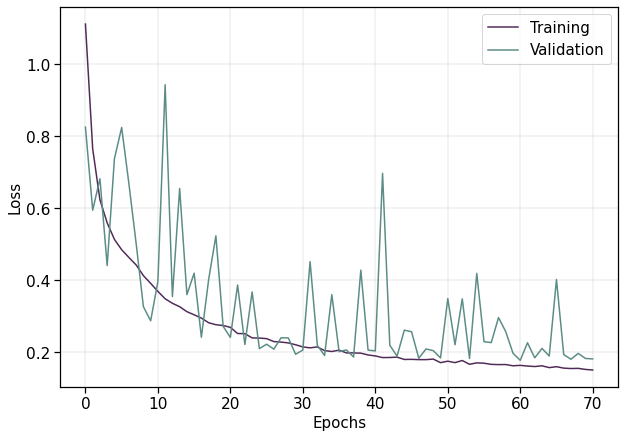

In [15]:
plt.figure(figsize=[10,7])
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation')
plt.grid(lw=0.3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=15)
plt.savefig(f'2_figures/{SELECTED_GFP}_DNN_learning_curve.png')

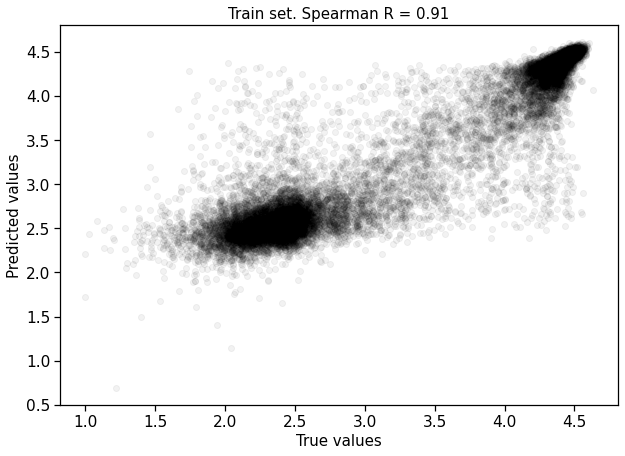

In [16]:
plt.figure(figsize=[10,7])
plt.plot(y_train.flatten(), train_set_predictions, 'ok', alpha=0.05)
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.title(f'Train set. Spearman R = {spearmanr(train_set_predictions, y_train.flatten())[0]:.2f}', fontsize=15)
plt.savefig(f'2_figures/{SELECTED_GFP}_DNN_train_predictions.png')

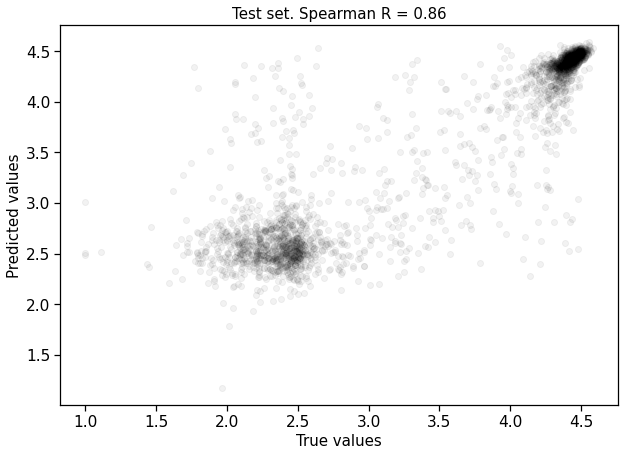

In [17]:
plt.figure(figsize=[10,7])
plt.plot(y_test.flatten(), test_set_predictions, 'ok', alpha=0.05)
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.title(f'Test set. Spearman R = {spearmanr(test_set_predictions, y_test.flatten())[0]:.2f}', fontsize=15)
plt.savefig(f'2_figures/{SELECTED_GFP}_DNN_test_predictions.png')

In [18]:
y_true=y_test.flatten()
y_pred=test_set_predictions
results=pd.DataFrame({"Predicted fluorescence":y_pred,"Observed fluorescence":y_true})

results.to_csv(join(figuresPath,f"for_paper/{SELECTED_GFP}_KP_model.csv"))